<div style="font-size: xx-large ; font-weight: 1000 ; color: rgba(0 , 102 , 102 , 0.8) ; line-height: 100%">Discontinuous Galerkin Methods</div>

<div style=" font-size: x-large ; font-weight: 1000 ; color: rgba(0 , 102 , 102 , 0.8) ; line-height: 100%"><br></br><br></br>Lagrange Interpolation</div>
<div style='position: relative; left: 50%; transform: translatey(-40%);background-image: url("./figs/crossingvortices_round.jpg") ; padding: 0px ; background-size: contain ; border-radius: 0px ; height: 200px; background-repeat: no-repeat;'>

## Project Description / General 
In this notebook, we will take a look at interpolation with Lagrange polynomials. Your task is to interpolate the function 
$$f(x)=x^3 -sin(3\pi x)-cos(4\pi x) \quad x\in[-1,1]$$
with a polynomial of degree $N=10$, i.e. on $N+1$ interpolation nodes. Proceed as follows: 

1. We will approximate the continuous function f(x) on a very fine sample grid. You can use the command x_sample=np.linspace(-1.,1.,nsample) to generate this grid, set $nsample=1000$ and keep it at this value for the rest of this notebook. Sample f(x) on this grid and plot the result. 
2. Write a function that returns $N+1$ **equidistant** interpolation nodes in the interval $x\in[-1,1]$. The points should include the boundaries, so the left most points is located at -1, the right most at +1.
3. Write a function that returns the Lagrange polynomials of degree $N$ **evaluated at a position $x_{pos}$**, given the set of interpolation nodes defined in 2. 
4. Using 2. and 3., plot the interpolant of degree $N=10$ of $f(x)$ on an equispaced grid. Hint: you can interpolate the function f from the sample grid onto the interpolation grid with numpy.interp()
5. Compute the $L_2$ error between $f(x)$ and your result with l2=np.sqrt(1./nsample*np.sum(np.square(f-interpolant)))
6. Report and plot the $L_2$ error over $N=2,..,32$ and report your observations.
7. For $N=10$ and the equispaced points from 2., the $L_2$ error should be about 4.25. Find - either by trial and error or some more clever means - a **better** set of points for $N=10$ in $x\in[-1,1]$ to interpolate $f(x)$. Report the point distribution, resulting error and a plot of the interpolant for a) a set of points with a worse error, b) a set of points with a better error, c) the best set you can find. Comment on your strategy for finding the points. What makes a "good" set?


You will submit your results as a ipython notebook via ILIAS. Your notebook should not only contain the python program, but also text / comments / figures. Make use of the static / dynamic structure of these notebooks to document your work, and to describe your results. The final notebook should document your work, your ideas and your results. You do not need to write long passages of text, short sentences are sufficient. If you want to include latex-syntax (for equations) that is fine as well. Whenever you are asked to comment, discuss, compare etc. below, this means that you should write *briefly* about your observations, and add a figure if necessary or helpful.  

# Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## 1. Approximation of f(x)

In [23]:
def equidistant_grid(x_min=-1., x_max=1., nsample=1000):
  # Input
  #   xmin:      Lower bound
  #   xmax:      upper bound
  #   nsample:   Number of grid points
  # Output
  #   x:         Array of x-coordinates
  return np.linspace(x_min,x_max,nsample)

def sample_f(x):
  # Input
  #   x:         Array of grid points
  # Output
  #   f:         Value of function f(x)=x3−sin(3πx)−cos(4πx) at grid points
  
  return x**3+np.sin(3*np.pi*x)-np.cos(4*np.pi*x)

def plot_f(x, f):
  # Input:
  #   x:         X axis points
  #   f:         Y axis points
  # output:
  #   plot:      Plots y=f(x)
  fig, ax = plt.subplots()
  ax.plot(x, f, color="black")
  ax.set(xlabel='x  [-]', ylabel='f  [-]')
  ax.grid()
  plt.show()
  return plt 



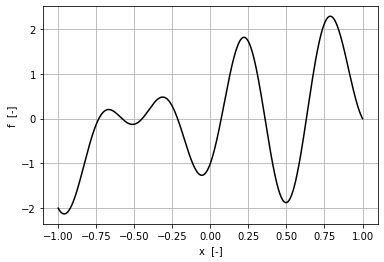

In [24]:
x_min=-1.
x_max=1
nsample=1000

x=equidistant_grid()
f=sample_f(x)
plt=plot_f(x, f)

## 2. Interpolation nodes

In [25]:
def p_interp(N= 10, x_min=-1., x_max=1.):
  # Input
  #   xmin:      Lower bound
  #   xmax:      upper bound
  #   N:         number of interpolation points-1
  # Output
  #   x:         Array of x-coordinates
  return np.linspace(x_min,x_max, N+1)

In [26]:
# Test implementation
N=10
x_min=-1
x_max=1
assert p_interp(N, x_min, x_max).shape[0]==N+1
assert p_interp(N, x_min, x_max)[0]==x_min
assert p_interp(N, x_min, x_max)[-1]==x_max

## 3. Generate Lagrange polynomials

In [27]:
class LagrangePoly:

    def __init__(self, x, f):
        self.n = len(x)
        self.x = np.array(x)
        self.f = np.array(f)

    def basis(self, x_node, N):
        b = [(x_node - self.x[m]) / (self.x[N] - self.x[m])
             for m in range(self.n) if m != N]
        return np.prod(b, axis=0) * self.f[N]

    def interpolate(self, x_node):
        b = [self.basis(x_node, j) for j in range(self.n)]
        return np.sum(b, axis=0)

## 4. Interpolation of f(x) and plot

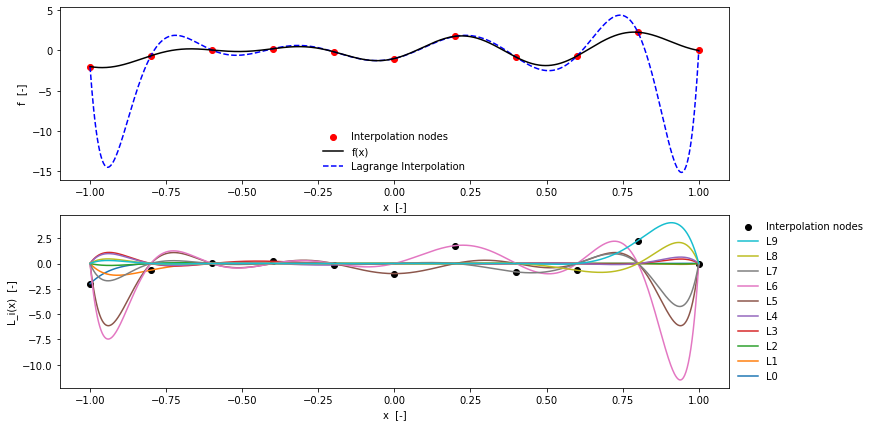

In [28]:
X_uniform=p_interp()
Y_uniform=sample_f(X_uniform)
lp = LagrangePoly(X_uniform, Y_uniform)
L_equidist= lp.interpolate(x) 

fig, ax=plt.subplots(2, 1, figsize=(12,7))
ax[0].scatter(X_uniform, Y_uniform, c='r', label='Interpolation nodes')
ax[0].plot(x, L_equidist, linestyle='--', color='blue', label='Lagrange Interpolation')
ax[0].plot(x, f, color='black', label='f(x)')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], frameon=False)

ax[1].scatter(X_uniform, Y_uniform, c='k', label='Interpolation nodes')
for i in range(N):
  ax[1].plot(x, lp.basis(x, i), label='L'+str(i))

ax[0].set(xlabel='x  [-]', ylabel='f  [-]')
ax[1].set(xlabel='x  [-]', ylabel='L_i(x)  [-]')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 5. L2 error

In [29]:
l2=np.sqrt(1./nsample*np.sum(np.square(f-L_equidist)))
print('L2 error with N=10:  %.2f'  % l2)

L2 error with N=10:  4.25


## 6. L2 error vs. N

After a given number of interpolation nodes the error drops exponentially. However it can be noticed that not a high number of nodes is required for a good interpolation inside the interpolation domain. The high $L_{\infty}$ error and $L_2$ comes from the extrema of the domain where oscillations can be noticed. This is known as the Runge phenomena. If the Runge phenomena can be overcome by redistributing the nodes, then the accuracy of the interpolation can be increased using polynomials of lower orders.

Interpolation for N= 2
Interpolation for N= 4
Interpolation for N= 8
Interpolation for N= 12
Interpolation for N= 16
Interpolation for N= 20
Interpolation for N= 24
Interpolation for N= 28
Interpolation for N= 32


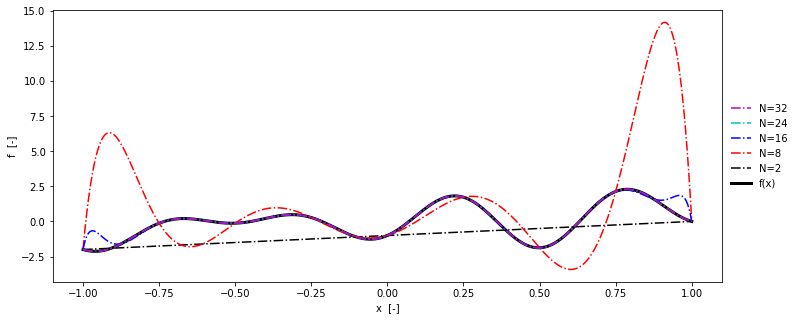

In [30]:
N=np.array([2,4,8,12,16,20,24,28,32])
l2=np.zeros(N.shape)
fig, ax=plt.subplots(1, figsize=(12,5))
ax.plot(x, f, color='black', linewidth=3, label='f(x)')
colors=['k','r','b','c','m']

for n in range(len(N)):
  print('Interpolation for N=',N[n,])
  X=p_interp(N[n], x_min, x_max)
  Y=sample_f(X)
  lp = LagrangePoly(X, Y).interpolate(x)
  l2[n,]=np.sqrt(1./nsample*np.sum(np.square(f-lp)))
  if np.mod(n,2)==0:
    ax.plot(x, lp, '-.', label='N='+str(N[n,]), color=colors[int(n/2)], linewidth=1.5);

ax.set(xlabel='x  [-]', ylabel='f  [-]')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

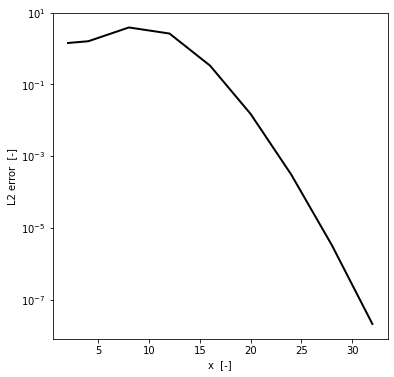

In [31]:
# plot L2 error
fig, ax = plt.subplots(1, figsize=(6,6))
plt.plot(N, l2, 'k', linewidth=2)
plt.yscale("log")
ax.set(xlabel='x  [-]', ylabel='L2 error  [-]')
plt.show()

## 7. Different sampling strategies

### Chebyshev nodes

In [32]:
def chebyshev_nodes(x_min=-1, x_max=1, nsample=11):
  x=np.zeros((nsample,))
  if x_min==-1 & x_max==1:
    for i in range(nsample):
      x[i,]=np.cos(((2*(i+1))-1)/(2*nsample))
  else:
    for i in range(nsample):
      x[i,]=0.5*(x_min+x_max)+0.5*(x_max-x_min)*np.cos((((2*(i+1))-1)*np.pi)/(2*nsample))
  return x

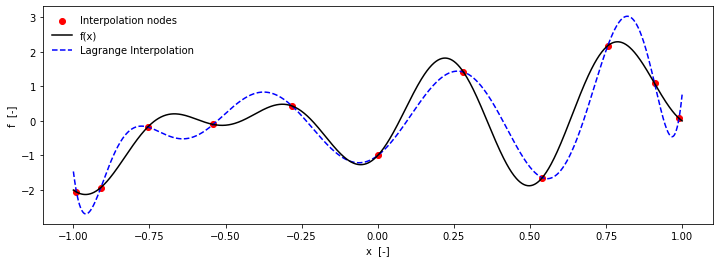

In [33]:
N=10
X_cheb=chebyshev_nodes()
Y_cheb=sample_f(X_cheb)
lp = LagrangePoly(X_cheb, Y_cheb)
L_cheb= lp.interpolate(x) 

fig, ax=plt.subplots(1, figsize=(12,4))
ax.scatter(X_cheb, Y_cheb, c='r', label='Interpolation nodes')
ax.plot(x, L_cheb, linestyle='--', color='blue', label='Lagrange Interpolation')
ax.plot(x, f, color='black', label='f(x)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)

ax.set(xlabel='x  [-]', ylabel='f  [-]')
plt.show()

In [34]:
l2_cheb=np.sqrt(1./nsample*np.sum(np.square(f-L_cheb)))
print('L2 error with Chebyshev nodes with N=10:  %.2f'  % l2_cheb)

L2 error with Chebyshev nodes with N=10:  0.53


### Gaus-Lobatto-Legendre nodes

In [35]:
def lgP (n, xi):
  """
  Evaluates P_{n}(xi) using an iterative algorithm
  """
  if n == 0:   
    return np.ones (xi.size) 
  elif n == 1:   
    return xi
  else:
    fP = np.ones (xi.size); sP = xi.copy (); nP = np.empty (xi.size)
    for i in range (2, n + 1):
      nP = ((2 * i - 1) * xi * sP - (i - 1) * fP) / i
      fP = sP; sP = nP
    return nP

def dLgP (n, xi):
  """
  Evaluates the first derivative of P_{n}(xi)
  """
  return n * (lgP (n - 1, xi) - xi * lgP (n, xi))\
           / (1 - xi ** 2)

def d2LgP (n, xi):
  """
  Evaluates the second derivative of P_{n}(xi)
  """
  return (2 * xi * dLgP (n, xi) - n * (n + 1)\
                                    * lgP (n, xi)) / (1 - xi ** 2)

def d3LgP (n, xi):
  """
  Evaluates the third derivative of P_{n}(xi)
  """
  return (4 * xi * d2LgP (n, xi)\
                 - (n * (n + 1) - 2) * dLgP (n, xi)) / (1 - xi ** 2)
                 
def gLLNodesAndWeights (n, epsilon = 1e-15):
  """
  Computes the GLL nodes and weights
  """
  if n < 2:   
    print ('Error: n must be larger than 1')
  else:   
    x = np.empty (n)
    w = np.empty (n)
    x[0] = -1; x[n - 1] = 1
    w[0] = w[0] = 2.0 / ((n * (n - 1))); w[n - 1] = w[0];
    n_2 = n // 2
    for i in range (1, n_2):
      xi = (1 - (3 * (n - 2)) / (8 * (n - 1) ** 3)) *\
           np.cos ((4 * i + 1) * np.pi / (4 * (n - 1) + 1))
      error = 1.0
      while error > epsilon:
        y  =  dLgP (n - 1, xi)
        y1 = d2LgP (n - 1, xi)
        y2 = d3LgP (n - 1, xi)
        dx = 2 * y * y1 / (2 * y1 ** 2 - y * y2)       
        xi -= dx
        error = abs (dx)     
      x[i] = -xi
      x[n - i - 1] =  xi     
      w[i] = 2 / (n * (n - 1) * lgP (n - 1, x[i]) ** 2)
      w[n - i - 1] = w[i]
    if n % 2 != 0:
      x[n_2] = 0;
      w[n_2] = 2.0 / ((n * (n - 1)) * lgP (n - 1, np.array (x[n_2])) ** 2)     
  return x, w

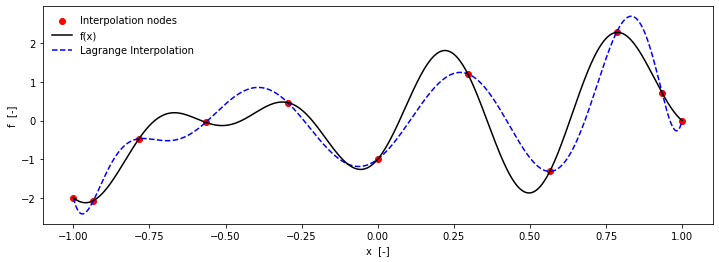

L2 error with GLL nodes with N=10:  0.57


In [38]:
N=10
X_GLL, _=gLLNodesAndWeights(N+1)
Y_GLL=sample_f(X_GLL)
lp = LagrangePoly(X_GLL, Y_GLL)
L_GLL= lp.interpolate(x) 

fig, ax=plt.subplots(1, figsize=(12,4))
ax.scatter(X_GLL, Y_GLL, c='r', label='Interpolation nodes')
ax.plot(x, L_GLL, linestyle='--', color='blue', label='Lagrange Interpolation')
ax.plot(x, f, color='black', label='f(x)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)

ax.set(xlabel='x  [-]', ylabel='f  [-]')
plt.show()

l2_GLL=np.sqrt(1./nsample*np.sum(np.square(f-L_GLL)))
print('L2 error with GLL nodes with N=10:  %.2f'  % l2_GLL)

In [37]:
def int_error(X):
  Y=sample_f(X)
  lp = LagrangePoly(X, Y)
  x=equidistant_grid()
  f=sample_f(x)
  L= lp.interpolate(x) 
  l2=np.sqrt(1./nsample*np.sum(np.square(f-L)))
  return l2

In [ ]:
#X0=p_interp()
X0=np.random.uniform(low=-1.0, high=1.0, size=(11,))
res = minimize(int_error, X0, method='nelder-mead', options={'xatol': 1e-3, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.396363
         Iterations: 709
         Function evaluations: 996


In [ ]:
Y_opt=sample_f(res.x)
lp = LagrangePoly(res.x, Y_opt)
L_opt= lp.interpolate(x)
l2_opt=np.sqrt(1./nsample*np.sum(np.square(f-L_opt)))
print('L2 error with optimal nodes (simplex) with N=10:  %.3f'  % l2_opt)

L2 error with optimal nodes (simplex) with N=10:  0.396


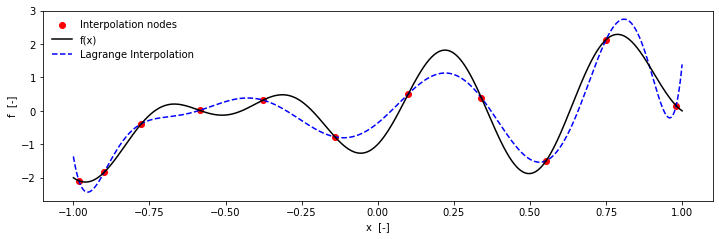

In [ ]:
fig, ax=plt.subplots(1, figsize=(12,3.5))
ax.scatter(res.x, Y_opt, c='r', label='Interpolation nodes')
ax.plot(x, L_opt, linestyle='--', color='blue', label='Lagrange Interpolation')
ax.plot(x, f, color='black', label='f(x)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)
ax.set(xlabel='x  [-]', ylabel='f  [-]')
plt.show()

In [40]:
N=np.array([2,4,8,10,12,16,20,24,28,32])
l2_uniform=np.zeros(N.shape)
l2_cheb=np.zeros(N.shape)
l2_optimal=np.zeros(N.shape)
l2_GLL=np.zeros(N.shape)

for n in range(len(N)):
  print('Interpolation with uniform distributed nodes for N=',N[n,])
  X=p_interp(N[n], x_min, x_max)
  Y=sample_f(X)
  lp = LagrangePoly(X, Y).interpolate(x)
  l2_uniform[n,]=np.sqrt(1./nsample*np.sum(np.square(f-lp)))

  print('Interpolation with chebyshev nodes for N=',N[n,])
  X=chebyshev_nodes(x_min, x_max, N[n])
  Y=sample_f(X)
  lp = LagrangePoly(X, Y).interpolate(x)
  l2_cheb[n,]=np.sqrt(1./nsample*np.sum(np.square(f-lp)))

  print('Interpolation with Gaus-Lobatto-Legendre nodes for N=',N[n,])
  X, _=gLLNodesAndWeights(N[n]+1)
  Y=sample_f(X)
  lp = LagrangePoly(X, Y).interpolate(x)
  l2_GLL[n,]=np.sqrt(1./nsample*np.sum(np.square(f-lp)))

  print('Interpolation with optimal for N=',N[n,])
  X0=chebyshev_nodes(x_min, x_max, N[n])
  res_opt = minimize(int_error, X0, method='nelder-mead', options={'xatol': 1e-11, 'disp': False, 'maxiter': 200})
  X=res_opt.x
  Y=sample_f(X)
  lp = LagrangePoly(X, Y).interpolate(x)
  l2_optimal[n,]=np.sqrt(1./nsample*np.sum(np.square(f-lp)))

Interpolation with uniform distributed nodes for N= 2
Interpolation with chebyshev nodes for N= 2
Interpolation with Gaus-Lobatto-Legendre nodes for N= 2
Interpolation with optimal for N= 2
Interpolation with uniform distributed nodes for N= 4
Interpolation with chebyshev nodes for N= 4
Interpolation with Gaus-Lobatto-Legendre nodes for N= 4
Interpolation with optimal for N= 4
Interpolation with uniform distributed nodes for N= 8
Interpolation with chebyshev nodes for N= 8
Interpolation with Gaus-Lobatto-Legendre nodes for N= 8
Interpolation with optimal for N= 8
Interpolation with uniform distributed nodes for N= 10
Interpolation with chebyshev nodes for N= 10
Interpolation with Gaus-Lobatto-Legendre nodes for N= 10
Interpolation with optimal for N= 10
Interpolation with uniform distributed nodes for N= 12
Interpolation with chebyshev nodes for N= 12
Interpolation with Gaus-Lobatto-Legendre nodes for N= 12
Interpolation with optimal for N= 12
Interpolation with uniform distributed nod

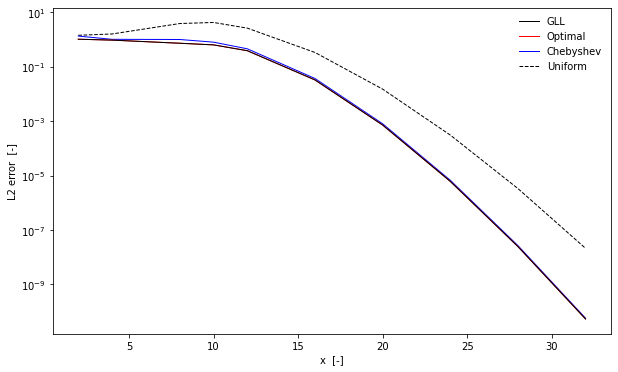

In [41]:
# plot L2 error
fig, ax = plt.subplots(1, figsize=(10,6))
plt.plot(N, l2_uniform, '--k', linewidth=1, label='Uniform')
plt.plot(N, l2_cheb, 'b', linewidth=1, label='Chebyshev' )
plt.plot(N, l2_optimal, 'r', linewidth=1, label='Optimal')
plt.plot(N, l2_optimal, 'k', linewidth=1, label='GLL')
plt.yscale("log")
ax.set(xlabel='x  [-]', ylabel='L2 error  [-]')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)
plt.show();

# Conclusion

The following strategies are used:
- Using the coordinates of the extrema of the Chebyshev polynomials (Chebyshev nodes) to generate the locations of the nodes. This yields a distribution that is more dense towards the extremities of the domain.
- Using Gaus-Lobatto-Legendre nodes.
- To find a better set of interpolation nodes a simplex-optimzer is used to minimize the L2 error.

The last approach finds a better set of points, but is very dependant on the choice of initial points and is also not realisable in real settings, as the L2 error has to be computed à posteriori for each step (It was only used here to visualize how an optimal set of nodes looks like). The Chebyshev nodes are a good choice of points and they reduced the $L_2$ at a complete order of magnitude in comparaison with an equidistant grid as reported in the following table and in the plots below. The Chebyshev and Legendre nodes did work for this case but it cannot be concluded that they work for every function with a high certainty.

| Points distribution | L2 error |
| --- | :-: |
| Equidistant grid | 4.25 | 
| Chebyshev extrema (nodes) | 0.53 | 
| Gauss-Lobatto-Legendre Points | 0.57 | 
| Optimal set of points obtained by minimizing the L2 error with respect to the node distribution (Initial value=equidisitant)  | 0.48 | 
| Optimal set of points obtained by minimizing the L2 error with respect to the node distribution (Initial value=drawn from a normal distribution)  | 0.39 | 

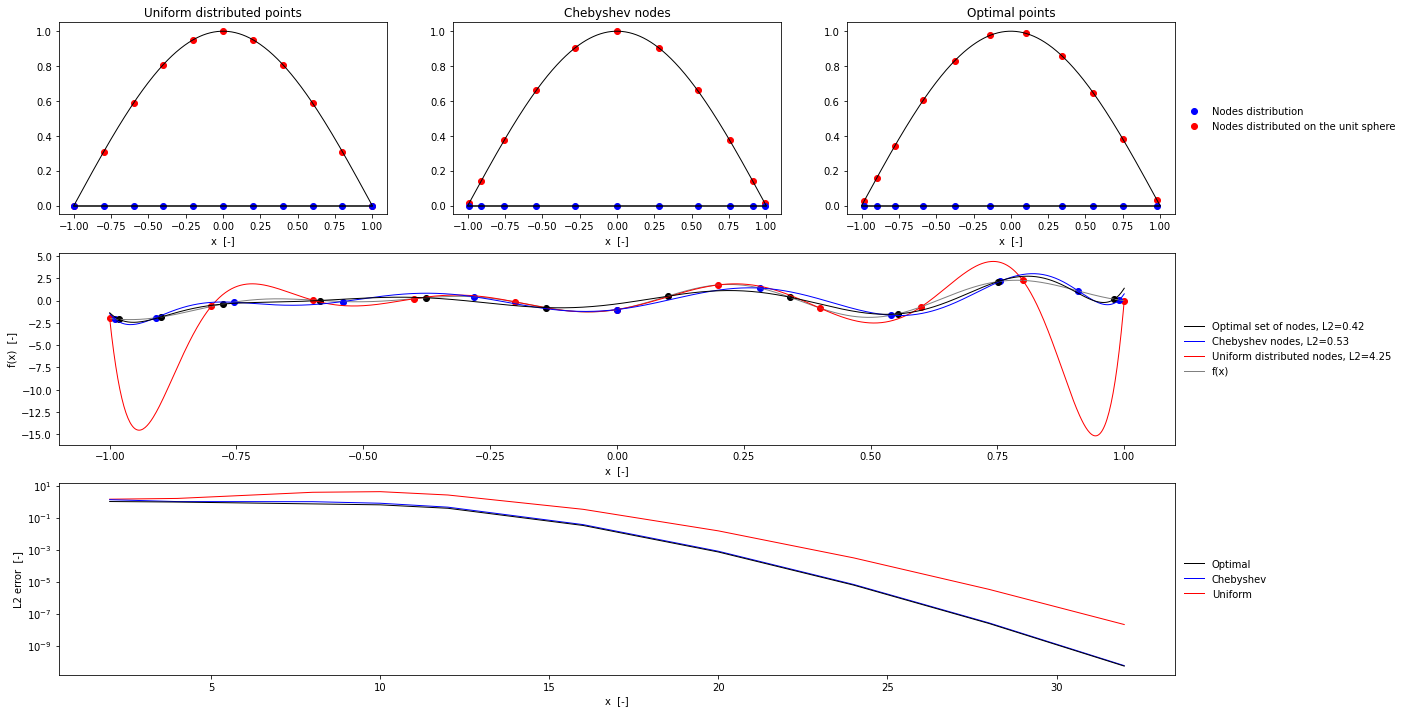

In [ ]:
equidist_f=np.cos(X_uniform*np.pi/2)
chebyshev_f=np.cos(X_cheb*np.pi/2)
optimal_f=np.cos(res.x*np.pi/2)

plt.figure(figsize=(20, 12))
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,1,2)
ax5 = plt.subplot(3,1,3)
ax = [ax1, ax2, ax3, ax4]

ax1.plot(equidistant_grid(-1,1,500), np.cos(equidistant_grid(-1,1,500)*np.pi/2), 'k', linewidth=1)
ax1.scatter(X_uniform, equidist_f, c='r', label='Nodes distributed on the unit sphere')
ax1.plot(np.linspace(-1,1,2),np.zeros((2,)), 'k')
ax1.scatter(X_uniform, np.zeros(X_uniform.shape), c='b', label='Nodes distribution')
ax1.set_xlabel('x  [-]')
ax1.set_title('Uniform distributed points')

ax2.plot(equidistant_grid(-1,1,500), np.cos(equidistant_grid(-1,1,500)*np.pi/2), 'k', linewidth=1)
ax2.scatter(X_cheb, chebyshev_f, c='r')
ax2.plot(np.linspace(-1,1,2),np.zeros((2,)), 'k')
ax2.scatter(X_cheb, np.zeros(X_cheb.shape), c='b')
ax2.set_xlabel('x  [-]')
ax2.set_title('Chebyshev nodes')

ax3.plot(equidistant_grid(-1,1,500), np.cos(equidistant_grid(-1,1,500)*np.pi/2), 'k', linewidth=1)
ax3.scatter(res.x, optimal_f, c='r', label='Nodes distributed on the unit sphere')
ax3.plot(np.linspace(-1,1,2),np.zeros((2,)), 'k')
ax3.scatter(res.x, np.zeros((res.x).shape), c='b', label='Nodes distribution')
ax3.set_xlabel('x  [-]')
ax3.set_title('Optimal points')


ax4.plot(x, f, color='gray', label='f(x)', linewidth=1)
ax4.plot(x, L_equidist, linestyle='-', color='red',  linewidth=1, label='Uniform distributed nodes, L2=4.25')
ax4.plot(x, L_cheb, linestyle='-', color='blue',  linewidth=1, label='Chebyshev nodes, L2=0.53')
ax4.plot(x, L_opt, linestyle='-', color='black',  linewidth=1, label='Optimal set of nodes, L2=0.42')
ax4.scatter(X_uniform, Y_uniform, c='red')
ax4.scatter(X_cheb, Y_cheb, c='blue')
ax4.scatter(res.x, Y_opt, c='black')
ax4.set_xlabel('x  [-]')
ax4.set_ylabel('f(x)  [-]')

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1], frameon=False, loc='center left', bbox_to_anchor=(1, 0.5));
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles[::-1], labels[::-1], frameon=False, loc='center left', bbox_to_anchor=(1, 0.5));

ax5.plot(N, l2_uniform, 'r', linewidth=1, label='Uniform')
ax5.plot(N, l2_cheb, 'b', linewidth=1, label='Chebyshev' )
ax5.plot(N, l2_optimal, 'k', linewidth=1, label='Optimal')
ax5.set_yscale("log")
ax5.set(xlabel='x  [-]', ylabel='L2 error  [-]')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles[::-1], labels[::-1], frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();